In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from io import BytesIO

In [2]:
ex = pd.read_excel('metric.xlsx')

In [3]:
ex = ex[['value_smoothed']]

<AxesSubplot:>

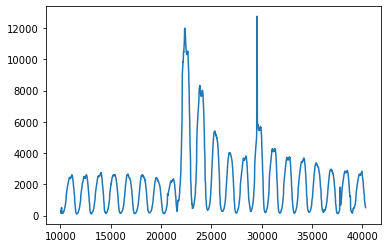

In [4]:
ex['week'] = ex['value_smoothed'].shift(periods=1440*7)
ex['day'] = ex['value_smoothed'].shift(periods=1440)
ex['target'] = ex['value_smoothed'].shift(1)

ex.dropna(inplace=True)
ex.week.plot()

In [5]:
data=ex

In [6]:
data

,value_smoothed,week,day,target
10080,216.5,168.0,274.5,219.0
10081,216.5,252.0,277.0,216.5
10082,216.5,223.0,277.0,216.5
10083,215.0,270.0,274.5,216.5
10084,214.5,206.0,271.5,215.0
...,...,...,...,...
40315,378.0,521.5,259.5,277.0
40316,288.0,520.0,258.0,378.0
40317,316.0,517.5,253.5,288.0
40318,357.0,513.5,250.0,316.0


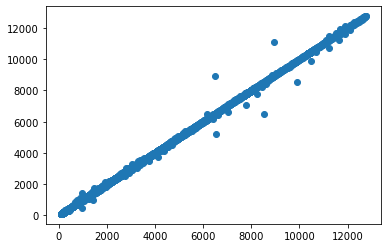

In [7]:
plt.scatter(data.value_smoothed, data.target)

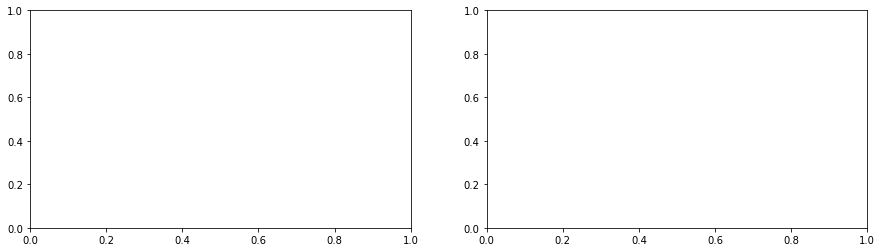

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['Diff_value_1'], lags=2000, ax=axes[0])
# fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['Diff_value_1'], lags=2000, ax=axes[1])

/Users/u19515364/.conda/envs/wotan_test37/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


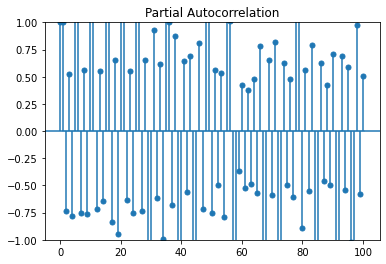

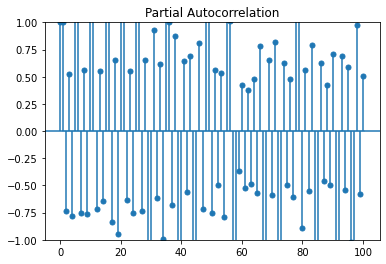

In [9]:
sm.graphics.tsa.plot_pacf(data.iloc[1:]['week'], lags=100)

<AxesSubplot:>

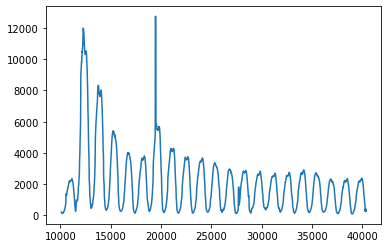

In [10]:
data['value_smoothed'].plot()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from tsfresh.examples import load_robot_execution_failures
from tsfresh.transformers import RelevantFeatureAugmenter


In [12]:
data

,value_smoothed,week,day,target
10080,216.5,168.0,274.5,219.0
10081,216.5,252.0,277.0,216.5
10082,216.5,223.0,277.0,216.5
10083,215.0,270.0,274.5,216.5
10084,214.5,206.0,271.5,215.0
...,...,...,...,...
40315,378.0,521.5,259.5,277.0
40316,288.0,520.0,258.0,378.0
40317,316.0,517.5,253.5,288.0
40318,357.0,513.5,250.0,316.0


In [13]:
data

,value_smoothed,week,day,target
10080,216.5,168.0,274.5,219.0
10081,216.5,252.0,277.0,216.5
10082,216.5,223.0,277.0,216.5
10083,215.0,270.0,274.5,216.5
10084,214.5,206.0,271.5,215.0
...,...,...,...,...
40315,378.0,521.5,259.5,277.0
40316,288.0,520.0,258.0,378.0
40317,316.0,517.5,253.5,288.0
40318,357.0,513.5,250.0,316.0


In [14]:
lm = LinearRegression()

fit_res = lm.fit(data[['week', 'day']], data.value_smoothed)

In [15]:
data[['week', 'day']]

,week,day
10080,168.0,274.5
10081,252.0,277.0
10082,223.0,277.0
10083,270.0,274.5
10084,206.0,271.5
...,...,...
40315,521.5,259.5
40316,520.0,258.0
40317,517.5,253.5
40318,513.5,250.0


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=2)
X_pca = pca.fit_transform(data[['week', 'day']])
print(pca.explained_variance_ratio_)

[0.70534964 0.29465036]


In [18]:
fit_res.coef_

array([0.1094736 , 0.63543358])

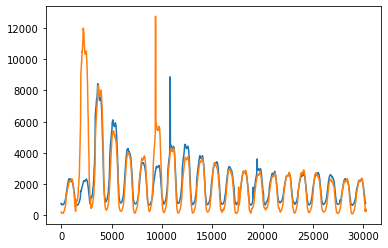

In [19]:
plt.plot(fit_res.predict(data[['week', 'day']]))
plt.plot(data.value_smoothed.reset_index().value_smoothed)

In [20]:
lm2 = LinearRegression()

fit_res2 = lm2.fit(X_pca, data.value_smoothed)

In [21]:
fit_res.coef_

array([0.1094736 , 0.63543358])

In [42]:
fit_res.intercept_

551.096638553385

In [22]:
np.corrcoef(data.week, data.day)

array([[1.       , 0.4106921],
       [0.4106921, 1.       ]])

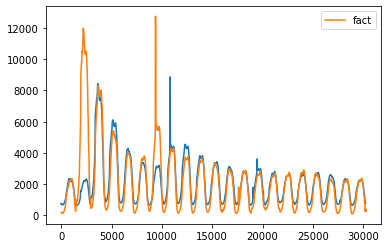

In [41]:
plt.plot(fit_res2.predict(X_pca))
plt.plot(data.value_smoothed.reset_index().value_smoothed, label='fact')
plt.legend()

In [35]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = data.value_smoothed
y_pred = fit_res2.predict(X_pca)
mean_absolute_percentage_error(y_true, y_pred)

0.6749449780275233

In [37]:
mean_absolute_percentage_error([1], [1.1])

0.10000000000000009

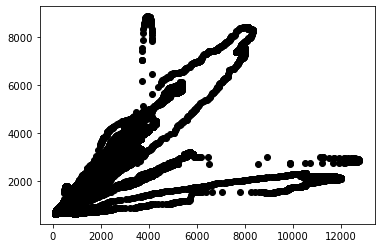

In [24]:

plt.scatter(data.value_smoothed, fit_res.predict(data[['week', 'day']]), color="black")


In [25]:
data

,value_smoothed,week,day,target
10080,216.5,168.0,274.5,219.0
10081,216.5,252.0,277.0,216.5
10082,216.5,223.0,277.0,216.5
10083,215.0,270.0,274.5,216.5
10084,214.5,206.0,271.5,215.0
...,...,...,...,...
40315,378.0,521.5,259.5,277.0
40316,288.0,520.0,258.0,378.0
40317,316.0,517.5,253.5,288.0
40318,357.0,513.5,250.0,316.0


In [26]:
from tsfresh.examples import load_robot_execution_failures


In [27]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures
download_robot_execution_failures()

In [28]:
df_ts, y = load_robot_execution_failures()


In [29]:
data

,value_smoothed,week,day,target
10080,216.5,168.0,274.5,219.0
10081,216.5,252.0,277.0,216.5
10082,216.5,223.0,277.0,216.5
10083,215.0,270.0,274.5,216.5
10084,214.5,206.0,271.5,215.0
...,...,...,...,...
40315,378.0,521.5,259.5,277.0
40316,288.0,520.0,258.0,378.0
40317,316.0,517.5,253.5,288.0
40318,357.0,513.5,250.0,316.0


In [30]:
data

,value_smoothed,week,day,target
10080,216.5,168.0,274.5,219.0
10081,216.5,252.0,277.0,216.5
10082,216.5,223.0,277.0,216.5
10083,215.0,270.0,274.5,216.5
10084,214.5,206.0,271.5,215.0
...,...,...,...,...
40315,378.0,521.5,259.5,277.0
40316,288.0,520.0,258.0,378.0
40317,316.0,517.5,253.5,288.0
40318,357.0,513.5,250.0,316.0


In [31]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [32]:
df_ts

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [33]:


# Download dataset

pipeline = Pipeline([
            ('augmenter', RelevantFeatureAugmenter(column_id='value_smoothed', column_sort='index')),
            ('regressor', LinearRegression()),
            ])

df_ts = data[['value_smoothed']]
y = data[['value_smoothed']]

# df_ts, y = load_robot_execution_failures()
X = pd.DataFrame(index=y.index)

pipeline.set_params(augmenter__timeseries_container=df_ts)
pipeline.fit(X, y)


ValueError: Could not guess the value column! Please hand it to the function as an argument.

In [ ]:
res

NameError: name 'res' is not defined

In [ ]:
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters


In [ ]:
extraction_settings = ComprehensiveFCParameters()

X = extract_features(df, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)